<a href="https://colab.research.google.com/github/AntTranAnt/CS4375_HW1/blob/main/CS4375_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [2]:
url = "https://raw.githubusercontent.com/AntTranAnt/CS4375_HW1/main/winequality-white.csv"
df = pd.read_csv(url, delimiter=';')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
#Drop any rows with null or NA values
df = df.dropna()

#Drop any duplicate rows
df = df.drop_duplicates()

#Split attributes and output
y = df['quality']
x = df.drop('quality', axis=1)

#Standardize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

<Axes: >

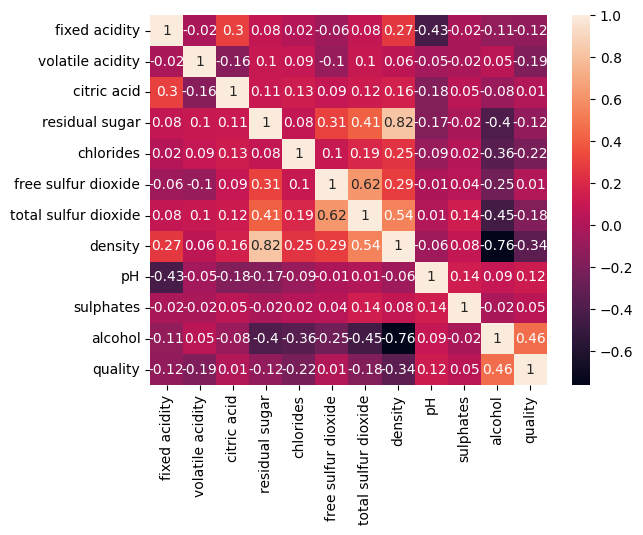

In [5]:
#Figure out highest correlating attributes
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [6]:
#alcohol, ph, and sulphate has highest correlation so pick these values
features = ['alcohol', 'pH', 'sulphates']
x = x_scaled[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3) #80/20 test split

In [29]:
#Create model with parameters
max_iter = 10000
eta0 = 0.0001
alpha = 0.0001
early_stopping = True
random_state = 23

sgd = SGDRegressor(max_iter=max_iter, eta0=eta0, early_stopping=early_stopping, random_state=random_state)
sgd.fit(x_train, y_train)

SGDRegressor(early_stopping=True, eta0=0.0001, max_iter=10000, random_state=23)

In [30]:
#print results
y_pred = sgd.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
ev = explained_variance_score(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
#Training set testing
print('Model performance for: max_iter=' + str(max_iter) + ', eta0=' + str(eta0) + ', alpha=' + str(alpha) + ', early_stopping=' + str(early_stopping))
print('--------------------------------------------------------------------------------')
print('Training set:')
print("MSE: " + str(mse))
print("MAE: " + str(mae))
print("EV: " + str(ev))
print("R2: " + str(r2))

#Testing set testing
y_pred = sgd.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#Training set testing
print('Testing set:')
print("MSE: " + str(mse))
print("MAE: " + str(mae))
print("EV: " + str(ev))
print("R2: " + str(r2))

Model performance for: max_iter=10000, eta0=0.0001, alpha=0.0001, early_stopping=True
--------------------------------------------------------------------------------
Training set:
MSE: 0.6422526919621929
MAE: 0.6220406212230286
EV: 0.22737573971194835
R2: 0.18602546724725566
Testing set:
MSE: 0.6906878443313026
MAE: 0.644319868752031
EV: 0.19945333084711503
R2: 0.14410015248392916
